# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.084865e+01     7.335442e+00
 * time: 0.0016319751739501953
     1     2.959904e+01     4.734036e+00
 * time: 0.006606101989746094
     2     2.177734e+01     4.481638e+00
 * time: 0.010503053665161133
     3     1.615036e+01     4.312385e+00
 * time: 0.013885021209716797
     4     1.179646e+01     1.594247e+00
 * time: 0.017405033111572266
     5     1.149476e+01     2.797183e+00
 * time: 0.020407915115356445
     6     1.041405e+01     1.681412e+00
 * time: 0.023504018783569336
     7     9.551535e+00     1.764908e+00
 * time: 0.026595115661621094
     8     9.113527e+00     1.595450e+00
 * time: 0.029963016510009766
     9     8.797888e+00     1.497877e+00
 * time: 0.06951308250427246
    10     8.504945e+00     1.001744e+00
 * time: 0.07236695289611816
    11     8.281781e+00     8.679236e-01
 * time: 0.07516098022460938
    12     8.114057e+00     5.236887e-01
 * time: 0.07792401313781738
    13     8.032708e+00     4.013691e-0

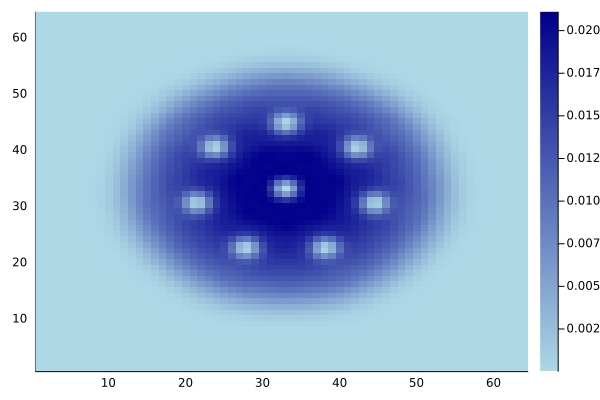

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)